In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import keras

In [2]:
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps, :]
    features.append(data_seq)

    seq_label = data[i+steps, :]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [3]:
speed_train_data = pd.read_csv('/content/speeds_train_out.csv').to_numpy()
speed_test_data = pd.read_csv('/content/speeds_test_out.csv').to_numpy()

In [4]:
speed_train_data

array([[ 9.66138664e-01,  1.69463352e+00,  1.93297701e+00, ...,
         1.80237313e+00,  1.85577901e+00,  2.66710022e+00],
       [-6.02055124e-01, -4.63703234e-01, -1.01494157e+00, ...,
        -1.29256102e+00,  1.59812394e+00,  2.74096802e+00],
       [-1.09439503e+00, -6.75682737e-01, -3.98160431e-04, ...,
         7.28511087e-02, -1.34650537e+00,  4.75386548e+00],
       ...,
       [ 3.82624696e-01, -1.16827685e-01, -4.02387057e-01, ...,
         6.91837938e-01, -1.19927390e+00,  1.02354174e+00],
       [ 2.54981016e-01, -1.20250190e-03,  4.20733065e-01, ...,
        -7.09985176e-01,  6.77927283e-01, -9.15487927e-01],
       [-1.18556909e+00,  2.87860456e-01, -6.89521983e-01, ...,
        -2.73053296e-01,  3.46656486e-01, -2.90743648e-02]])

In [5]:
TIME_STEPS = 2

train_features, train_labels = create_dataset(speed_train_data, TIME_STEPS)
test_features, test_labels = create_dataset(speed_train_data, TIME_STEPS)

In [6]:
train_features.shape # 1248 rows (data points) 3 columns (3 ki window) 17 depth (17 vehicles)

(1248, 2, 17)

In [7]:
train_labels.shape

(1248, 17)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(25))
model.add(keras.layers.Dense(17))

model.compile(optimizer='adam', loss=['mse', 'mae'])

In [9]:
history = model.fit(train_features, train_labels, batch_size=64, epochs=100, shuffle=False, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 10s 46ms/step - loss: 0.9941 - val_loss: 1.0131
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9862 - val_loss: 1.0067
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9783 - val_loss: 0.9998
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9692 - val_loss: 0.9916
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9579 - val_loss: 0.9813
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9431 - val_loss: 0.9674
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9224 - val_loss: 0.9468
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8925 - val_loss: 0.9155
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8513 - val_loss: 0.8749
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.8067 - val_loss: 0.8389
Epoch 1

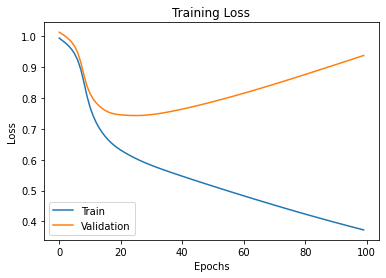

In [10]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(17))
model.add(keras.layers.Dense(17))

model.compile(optimizer='adam', loss=['mse', 'mae'])

In [12]:
history = model.fit(train_features, train_labels, batch_size=64, epochs=100, shuffle=False, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 4s 46ms/step - loss: 0.9931 - val_loss: 1.0129
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.9861 - val_loss: 1.0069
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.9790 - val_loss: 1.0002
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9708 - val_loss: 0.9922
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9607 - val_loss: 0.9822
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9474 - val_loss: 0.9690
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9291 - val_loss: 0.9506
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9034 - val_loss: 0.9250
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8692 - val_loss: 0.8938
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8321 - val_loss: 0.8650
Epoch 11

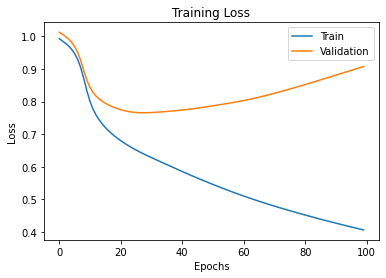

In [13]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Epoch 1/100
18/18 [==============================] - 3s 47ms/step - loss: 0.9933 - val_loss: 1.0156
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9895 - val_loss: 1.0121
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9856 - val_loss: 1.0082
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9813 - val_loss: 1.0037
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9763 - val_loss: 0.9982
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9700 - val_loss: 0.9910
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9620 - val_loss: 0.9810
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.9515 - val_loss: 0.9675
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 0.9385 - val_loss: 0.9516
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 0.9246 - val_loss: 0.9379
Epoch 11

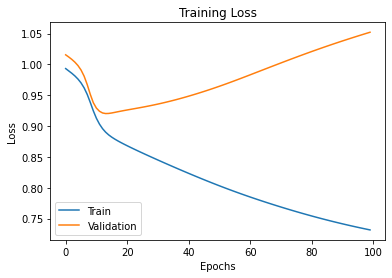

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(5))
model.add(keras.layers.Dense(17))

model.compile(optimizer='adam', loss=['mse', 'mae'])

history = model.fit(train_features, train_labels, batch_size=64, epochs=100, shuffle=False, validation_split=0.1)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Epoch 1/100
37/37 [==============================] - 3s 19ms/step - loss: 0.9955 - val_loss: 0.9474
Epoch 2/100
37/37 [==============================] - 1s 14ms/step - loss: 0.9530 - val_loss: 0.9130
Epoch 3/100
37/37 [==============================] - 0s 12ms/step - loss: 0.9164 - val_loss: 0.8826
Epoch 4/100
37/37 [==============================] - 0s 13ms/step - loss: 0.8832 - val_loss: 0.8551
Epoch 5/100
37/37 [==============================] - 0s 12ms/step - loss: 0.8516 - val_loss: 0.8300
Epoch 6/100
37/37 [==============================] - 0s 13ms/step - loss: 0.8218 - val_loss: 0.8069
Epoch 7/100
37/37 [==============================] - 0s 12ms/step - loss: 0.7929 - val_loss: 0.7859
Epoch 8/100
37/37 [==============================] - 0s 12ms/step - loss: 0.7658 - val_loss: 0.7671
Epoch 9/100
37/37 [==============================] - 0s 12ms/step - loss: 0.7404 - val_loss: 0.7507
Epoch 10/100
37/37 [==============================] - 0s 12ms/step - loss: 0.7174 - val_loss: 0.7370

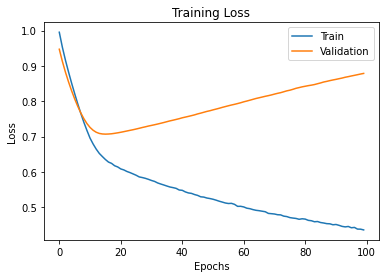

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(40, recurrent_dropout=0.2, input_shape=(train_features.shape[1], train_features.shape[2])))
# model.add(keras.layers.LSTM(15))
model.add(keras.layers.Dense(17))

model.compile(optimizer='adam', loss=['mse', 'mae'])

history = model.fit(train_features, train_labels, batch_size=24, epochs=100, shuffle=False, validation_split=0.3)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [22]:
position_train_data = pd.read_csv('/content/positions_train_out.csv').to_numpy()
position_test_data = pd.read_csv('/content/positions_test_out.csv').to_numpy()

In [23]:
TIME_STEPS = 2

train_features, train_labels = create_dataset(position_train_data, TIME_STEPS)
test_features, test_labels = create_dataset(position_test_data, TIME_STEPS)

Epoch 1/100
37/37 [==============================] - 2s 18ms/step - loss: 1.0353 - val_loss: 0.9356
Epoch 2/100
37/37 [==============================] - 0s 13ms/step - loss: 1.0192 - val_loss: 0.9326
Epoch 3/100
37/37 [==============================] - 0s 12ms/step - loss: 1.0084 - val_loss: 0.9309
Epoch 4/100
37/37 [==============================] - 0s 13ms/step - loss: 0.9993 - val_loss: 0.9302
Epoch 5/100
37/37 [==============================] - 0s 12ms/step - loss: 0.9912 - val_loss: 0.9299
Epoch 6/100
37/37 [==============================] - 0s 13ms/step - loss: 0.9832 - val_loss: 0.9300
Epoch 7/100
37/37 [==============================] - 0s 13ms/step - loss: 0.9759 - val_loss: 0.9304
Epoch 8/100
37/37 [==============================] - 0s 12ms/step - loss: 0.9683 - val_loss: 0.9310
Epoch 9/100
37/37 [==============================] - 0s 12ms/step - loss: 0.9613 - val_loss: 0.9317
Epoch 10/100
37/37 [==============================] - 0s 12ms/step - loss: 0.9540 - val_loss: 0.9326

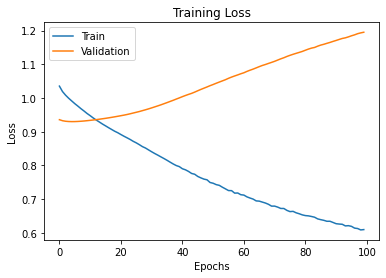

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(40, recurrent_dropout=0.2, input_shape=(train_features.shape[1], train_features.shape[2])))
# model.add(keras.layers.LSTM(15))
model.add(keras.layers.Dense(17))

model.compile(optimizer='adam', loss=['mse', 'mae'])

history = model.fit(train_features, train_labels, batch_size=24, epochs=100, shuffle=False, validation_split=0.3)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [25]:
# ANN for positions
pos_train = pd.read_csv('/content/positions_train_out.csv')

In [67]:
pos_test = pd.read_csv('/content/positions_train_out.csv')

In [26]:
pos_train.head()

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos
0,0.778512,1.499770,1.340113,-0.040839,0.136562,0.234904,1.395683,-1.143272,1.026049,0.930249,-0.170940,1.736622,-6.295961,-1.485665,1.524073,-1.572532,-12.966630
1,-0.111419,0.849430,-0.076034,1.269443,0.507654,0.936787,-1.149528,0.906347,0.237767,-1.616866,-0.488240,0.221944,-7.264590,-1.460656,-0.333336,0.694100,-9.556867
2,-1.681887,-0.098982,-0.076034,-0.460129,-0.393570,0.558850,1.647684,-0.797232,-1.259969,-0.104517,-0.567565,1.601383,-7.376355,1.190317,-0.200664,-1.207787,-3.714805
3,1.275827,1.608160,-1.064665,-0.905625,1.594425,-0.520970,1.194082,-1.542548,-1.601557,-1.378074,-0.250265,0.654709,-7.637140,-0.760399,-0.094526,0.329355,0.899741
4,-1.079875,-0.126079,0.244603,0.247423,-0.048984,-0.224019,-0.040723,0.267504,1.183705,-1.059685,0.331451,-0.968161,-8.990737,1.415400,0.860712,-0.895148,1.149790


In [30]:
pos_train['feature_col'] = range(1, len(pos_train)+1)

In [31]:
pos_train

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos,feature_col
0,0.778512,1.499770,1.340113,-0.040839,0.136562,0.234904,1.395683,-1.143272,1.026049,0.930249,-0.170940,1.736622,-6.295961,-1.485665,1.524073,-1.572532,-12.966630,1
1,-0.111419,0.849430,-0.076034,1.269443,0.507654,0.936787,-1.149528,0.906347,0.237767,-1.616866,-0.488240,0.221944,-7.264590,-1.460656,-0.333336,0.694100,-9.556867,2
2,-1.681887,-0.098982,-0.076034,-0.460129,-0.393570,0.558850,1.647684,-0.797232,-1.259969,-0.104517,-0.567565,1.601383,-7.376355,1.190317,-0.200664,-1.207787,-3.714805,3
3,1.275827,1.608160,-1.064665,-0.905625,1.594425,-0.520970,1.194082,-1.542548,-1.601557,-1.378074,-0.250265,0.654709,-7.637140,-0.760399,-0.094526,0.329355,0.899741,4
4,-1.079875,-0.126079,0.244603,0.247423,-0.048984,-0.224019,-0.040723,0.267504,1.183705,-1.059685,0.331451,-0.968161,-8.990737,1.415400,0.860712,-0.895148,1.149790,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1.066431,-1.372563,-1.224983,-1.403532,1.620932,-0.008055,-1.023528,-1.515930,1.315085,1.115976,-0.091615,0.816996,-0.608369,-1.210564,0.091215,1.527804,0.581496,1246
1246,0.699989,0.984918,0.271323,-1.246298,-0.367063,-0.871911,-0.393525,-0.717377,1.420190,-1.218879,-0.990631,-1.482069,-0.484185,-0.060142,-0.678283,1.371484,-0.077724,1247
1247,1.249653,0.822333,-0.263072,-1.272504,1.461892,-0.439983,1.168882,-0.185009,1.604122,-1.165815,-1.228606,-0.210822,0.745229,-0.110160,0.303490,-0.295923,1.195254,1248
1248,1.616095,0.795235,0.298043,1.321854,0.375121,-0.790925,-0.847127,-1.569167,1.446466,1.248638,1.018934,-1.346830,0.149149,0.239968,-0.731352,0.641994,0.081398,1249


In [43]:
position_train_features = pos_train['feature_col']

In [54]:
position_train_labels = pos_train.iloc[:, :-1]

In [69]:
pos_test['feature_col'] = range(1, len(pos_test)+1)

position_test_features = pos_test['feature_col']

In [71]:
position_test_labels = pos_test.iloc[:, :-1]

In [55]:
position_train_labels

,veh_1_pos,veh_2_pos,veh_3_pos,veh_4_pos,veh_5_pos,veh_6_pos,veh_7_pos,veh_8_pos,veh_9_pos,veh_10_pos,veh_11_pos,veh_12_pos,veh_13_pos,veh_14_pos,veh_15_pos,veh_16_pos,veh_17_pos
0,0.778512,1.499770,1.340113,-0.040839,0.136562,0.234904,1.395683,-1.143272,1.026049,0.930249,-0.170940,1.736622,-6.295961,-1.485665,1.524073,-1.572532,-12.966630
1,-0.111419,0.849430,-0.076034,1.269443,0.507654,0.936787,-1.149528,0.906347,0.237767,-1.616866,-0.488240,0.221944,-7.264590,-1.460656,-0.333336,0.694100,-9.556867
2,-1.681887,-0.098982,-0.076034,-0.460129,-0.393570,0.558850,1.647684,-0.797232,-1.259969,-0.104517,-0.567565,1.601383,-7.376355,1.190317,-0.200664,-1.207787,-3.714805
3,1.275827,1.608160,-1.064665,-0.905625,1.594425,-0.520970,1.194082,-1.542548,-1.601557,-1.378074,-0.250265,0.654709,-7.637140,-0.760399,-0.094526,0.329355,0.899741
4,-1.079875,-0.126079,0.244603,0.247423,-0.048984,-0.224019,-0.040723,0.267504,1.183705,-1.059685,0.331451,-0.968161,-8.990737,1.415400,0.860712,-0.895148,1.149790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1.066431,-1.372563,-1.224983,-1.403532,1.620932,-0.008055,-1.023528,-1.515930,1.315085,1.115976,-0.091615,0.816996,-0.608369,-1.210564,0.091215,1.527804,0.581496
1246,0.699989,0.984918,0.271323,-1.246298,-0.367063,-0.871911,-0.393525,-0.717377,1.420190,-1.218879,-0.990631,-1.482069,-0.484185,-0.060142,-0.678283,1.371484,-0.077724
1247,1.249653,0.822333,-0.263072,-1.272504,1.461892,-0.439983,1.168882,-0.185009,1.604122,-1.165815,-1.228606,-0.210822,0.745229,-0.110160,0.303490,-0.295923,1.195254
1248,1.616095,0.795235,0.298043,1.321854,0.375121,-0.790925,-0.847127,-1.569167,1.446466,1.248638,1.018934,-1.346830,0.149149,0.239968,-0.731352,0.641994,0.081398


In [56]:
def build_model():
  model = keras.Sequential([
  keras.layers.Dense(64),
  keras.layers.Dense(64),
  keras.layers.Dense(17)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [57]:
model = build_model()

In [58]:
history = model.fit(position_train_features, position_train_labels, epochs=130, batch_size=16, validation_split=0.3)

Epoch 1/130
55/55 [==============================] - 1s 6ms/step - loss: 1463.6851 - mae: 12.3813 - val_loss: 85.4445 - val_mae: 8.0971
Epoch 2/130
55/55 [==============================] - 0s 4ms/step - loss: 124.4269 - mae: 6.8202 - val_loss: 504.6024 - val_mae: 18.6971
Epoch 3/130
55/55 [==============================] - 0s 4ms/step - loss: 120.1037 - mae: 7.1202 - val_loss: 393.4358 - val_mae: 16.8933
Epoch 4/130
55/55 [==============================] - 0s 4ms/step - loss: 102.4615 - mae: 7.0800 - val_loss: 49.0709 - val_mae: 5.5678
Epoch 5/130
55/55 [==============================] - 0s 4ms/step - loss: 98.4679 - mae: 6.6957 - val_loss: 391.0815 - val_mae: 16.1050
Epoch 6/130
55/55 [==============================] - 0s 4ms/step - loss: 86.0329 - mae: 6.2499 - val_loss: 75.5523 - val_mae: 7.4354
Epoch 7/130
55/55 [==============================] - 0s 4ms/step - loss: 80.1783 - mae: 5.8531 - val_loss: 447.3368 - val_mae: 18.5101
Epoch 8/130
55/55 [==============================] - 0s

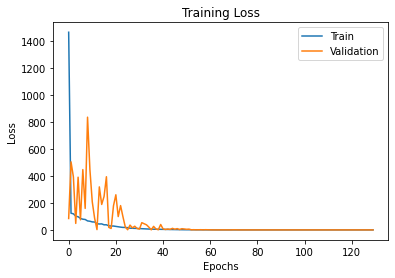

In [59]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [60]:
min(history.history['loss'])

1.0386110544204712

In [61]:
min(history.history['val_loss'])

0.9340316653251648

In [62]:
import math

In [63]:
math.sqrt(0.9340316653251648)

0.9664531366420023

In [64]:
min(history.history['mae'])

0.8402406573295593

In [65]:
min(history.history['val_mae'])

0.8319738507270813

In [66]:
math.sqrt(0.8319738507270813)

0.9121260059482359

In [72]:
p = model.predict(position_test_features)

In [73]:
p.shape

(1250, 17)

In [83]:
x = pd.DataFrame(p)

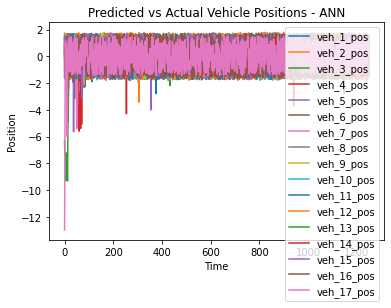

In [75]:
plt.plot(pos_test.iloc[:, :-1]);
plt.title('Predicted vs Actual Vehicle Positions - ANN')
plt.xlabel('Time');
plt.ylabel('Position');
plt.legend(pos_test.columns);

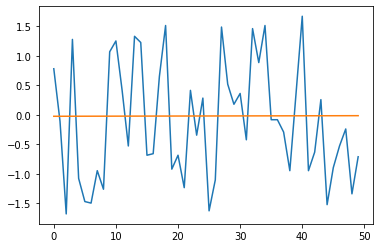

In [84]:
plt.plot(pos_test.iloc[:50, 0])
plt.plot(x.iloc[:50, 0])

In [105]:
pos_df = pd.read_csv('/content/positions_renamed.csv')

In [ ]:
pos_df

In [107]:
pos_df['feature_col'] = range(1, 1472)

In [108]:
pos_df_train_features = pos_df.iloc[:1300, -1]

In [109]:
pos_df_test_features = pos_df.iloc[1300:, -1]

In [110]:
pos_df_train_labels = pos_df.iloc[:1300, :-1]

In [111]:
pos_df_test_labels = pos_df.iloc[1300:, :-1]

In [112]:
# mean = pos_df_train_labels.mean()
# std = pos_df_train_labels.mean()

# pos_df_train_labels=(pos_df_train_labels - mean)/std
# pos_df_test_labels=(pos_df_test_labels - mean)/std

In [113]:
mean_f = pos_df_train_features.mean()
std_f = pos_df_train_features.mean()

pos_df_train_features=(pos_df_train_features - mean_f)/std_f
pos_df_test_features=(pos_df_test_features - mean_f)/std_f

In [119]:
def build_model():
  model = keras.Sequential([
  keras.layers.Dense(64),
  keras.layers.Dense(32),
  keras.layers.Dense(17)
  ])
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])
  return model

In [120]:
model = build_model()

In [121]:
history = model.fit(pos_df_train_features, pos_df_train_labels, epochs=500, batch_size=16, validation_split=0.2)

Epoch 1/500
65/65 [==============================] - 1s 5ms/step - loss: 31651570.0000 - mae: 4608.6367 - val_loss: 116644624.0000 - val_mae: 10087.7412
Epoch 2/500
65/65 [==============================] - 0s 3ms/step - loss: 31575724.0000 - mae: 4601.7207 - val_loss: 116125912.0000 - val_mae: 10062.8340
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 31221112.0000 - mae: 4568.1724 - val_loss: 114403072.0000 - val_mae: 9978.5615
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 30312222.0000 - mae: 4481.2319 - val_loss: 110631936.0000 - val_mae: 9790.6973
Epoch 5/500
65/65 [==============================] - 0s 3ms/step - loss: 28643506.0000 - mae: 4317.1138 - val_loss: 104145472.0000 - val_mae: 9458.3916
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 26113044.0000 - mae: 4062.8398 - val_loss: 95008936.0000 - val_mae: 8969.9912
Epoch 7/500
65/65 [==============================] - 0s 3ms/step - loss: 22792774.0000 

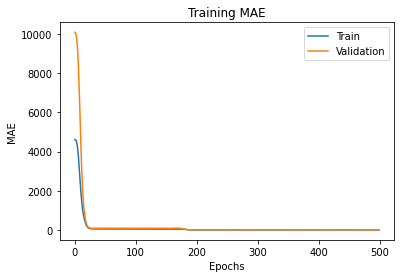

In [122]:
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title('Training MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [125]:
min(history.history['val_loss'])

21.665586471557617

In [124]:
min(history.history['mae'])

2.6329751014709473

In [126]:
df = pd.read_csv('sumo.csv')

In [127]:
df.head()

,timestep_time,vehicle_0_pos,vehicle_1_pos,vehicle_10_pos,vehicle_11_pos,vehicle_12_pos,vehicle_13_pos,vehicle_14_pos,vehicle_15_pos,vehicle_16_pos,vehicle_17_pos,vehicle_19_pos,vehicle_2_pos,vehicle_4_pos,vehicle_5_pos,vehicle_6_pos,vehicle_7_pos,vehicle_8_pos,vehicle_0_speed,vehicle_1_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed,vehicle_19_speed,vehicle_2_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed
0,54,643.23,362.75,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,186.78,99.19,55.45,30.70,18.04,5.10,12.13,6.92,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55,11.54,6.16,6.93,4.33,5.77,0.00
1,55,655.90,370.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,199.25,103.51,61.61,36.01,24.82,6.55,12.66,7.80,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88,12.47,4.32,6.16,5.32,6.78,1.45
2,56,668.23,378.11,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,211.16,107.05,67.78,40.62,32.47,9.50,12.33,7.56,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77,11.91,3.54,6.17,4.61,7.65,2.94
3,57,679.96,385.32,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95,223.58,110.50,75.01,45.28,39.39,15.02,11.73,7.21,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75,12.41,3.44,7.24,4.65,6.92,5.52
4,58,692.82,393.16,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81,235.65,113.74,81.46,49.98,46.90,22.57,12.86,7.84,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86,12.07,3.24,6.45,4.71,7.51,7.55


In [128]:
df.drop(columns=['timestep_time'], inplace=True)

In [153]:
train_df = df.iloc[:1200, :]
test_df = df.iloc[1200:, :]

In [154]:
test_df

,vehicle_0_pos,vehicle_1_pos,vehicle_10_pos,vehicle_11_pos,vehicle_12_pos,vehicle_13_pos,vehicle_14_pos,vehicle_15_pos,vehicle_16_pos,vehicle_17_pos,vehicle_19_pos,vehicle_2_pos,vehicle_4_pos,vehicle_5_pos,vehicle_6_pos,vehicle_7_pos,vehicle_8_pos,vehicle_0_speed,vehicle_1_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed,vehicle_19_speed,vehicle_2_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed
1200,15491.19,9058.63,12821.54,16544.94,13775.13,3430.78,14498.88,6241.84,8882.80,4735.49,13340.38,14380.96,11363.38,8161.49,5713.31,8873.72,8589.42,12.63,7.44,9.71,13.04,11.27,3.31,11.31,5.33,7.52,3.46,11.41,12.12,9.88,6.70,5.24,7.75,7.31
1201,15503.45,9065.92,12831.48,16558.42,13786.28,3433.02,14510.19,6246.88,8889.67,4739.96,13351.65,14393.03,11372.95,8168.03,5717.42,8881.73,8597.24,12.26,7.29,9.94,13.49,11.14,2.24,11.31,5.04,6.88,4.47,11.27,12.07,9.58,6.53,4.11,8.01,7.82
1202,15515.65,9073.51,12841.44,16571.28,13797.49,3435.16,14522.51,6252.06,8897.36,4744.13,13363.11,14404.22,11382.95,8175.08,5722.50,8889.21,8604.10,12.20,7.59,9.96,12.86,11.21,2.14,12.32,5.18,7.69,4.17,11.46,11.19,9.99,7.06,5.08,7.48,6.86
1203,15528.03,9080.20,12852.31,16584.22,13809.04,3438.15,14533.83,6257.07,8904.86,4748.46,13374.20,14415.52,11392.33,8181.36,5727.69,8897.08,8610.68,12.38,6.69,10.87,12.94,11.55,2.99,11.32,5.01,7.49,4.33,11.09,11.30,9.38,6.28,5.19,7.87,6.58
1204,15540.52,9087.22,12862.59,16597.46,13820.47,3441.16,14546.22,6262.65,8912.18,4752.05,13385.27,14427.61,11402.24,8187.90,5731.99,8904.14,8617.83,12.49,7.02,10.28,13.24,11.43,3.01,12.39,5.59,7.33,3.59,11.06,12.10,9.91,6.54,4.30,7.07,7.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,18785.21,10987.21,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,12.83,7.22,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43,12.17,9.67,6.62,5.31,7.81,7.16
1467,18797.48,10993.97,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,12.27,6.76,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97,11.76,9.33,7.38,5.14,7.36,7.03
1468,18810.39,11001.14,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,12.91,7.17,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26,11.54,9.55,6.38,5.37,7.80,7.72
1469,18822.92,11008.17,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,12.53,7.03,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59,11.31,8.87,6.78,4.50,7.45,7.11


In [130]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

MinMaxScaler()

In [132]:
train_dff = scaler.transform(train_df)
test_dff = scaler.transform(test_df)

In [134]:
train_dff.shape, test_df.shape

((1200, 34), (271, 34))

In [135]:
TIME_STEPS = 2

train_features, train_labels = create_dataset(train_df, TIME_STEPS)
test_features, test_labels = create_dataset(test_df, TIME_STEPS)

Epoch 1/100
17/17 [==============================] - 4s 49ms/step - loss: 0.3576 - val_loss: 0.6138
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2870 - val_loss: 0.5097
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2196 - val_loss: 0.4075
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1690 - val_loss: 0.3339
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1341 - val_loss: 0.2804
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1085 - val_loss: 0.2397
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0896 - val_loss: 0.2079
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0759 - val_loss: 0.1831
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0663 - val_loss: 0.1639
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0597 - val_loss: 0.1493
Epoch 11

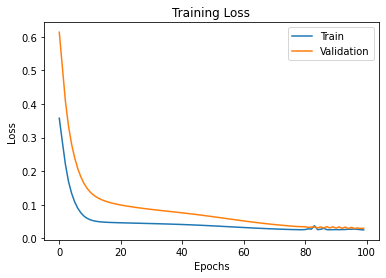

In [137]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(5))
model.add(keras.layers.Dense(34))

model.compile(optimizer='adam', loss=['mse', 'mae'])

history = model.fit(train_features, train_labels, batch_size=64, epochs=100, shuffle=False, validation_split=0.1)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [138]:
p = model.predict(test_features)

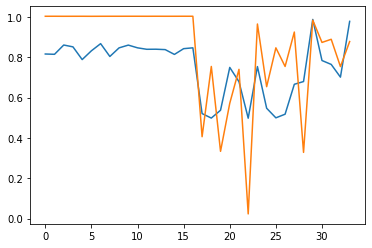

In [142]:
plt.plot(p[0])
plt.plot(test_labels[0])

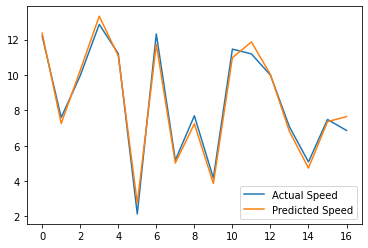

In [150]:
plt.plot(scaler.inverse_transform(test_labels)[0][17:], label="Actual Speed")
plt.plot(scaler.inverse_transform(p)[0][17:], label="Predicted Speed")
plt.legend()

array([[1.2741707e+04, 7.4359126e+03, 1.1085749e+04, ..., 4.7338104e+00,
        7.3611321e+00, 7.6422644e+00],
       [1.2776028e+04, 7.4478735e+03, 1.1105340e+04, ..., 4.7288775e+00,
        7.3560061e+00, 7.6307106e+00],
       [1.2752222e+04, 7.4400918e+03, 1.1090339e+04, ..., 4.7294521e+00,
        7.3575063e+00, 7.6302595e+00],
       ...,
       [1.2925222e+04, 7.5387959e+03, 1.1223807e+04, ..., 4.7328868e+00,
        7.3561363e+00, 7.6477981e+00],
       [1.2920371e+04, 7.5344741e+03, 1.1219623e+04, ..., 4.7343884e+00,
        7.3571587e+00, 7.6520538e+00],
       [1.2918570e+04, 7.5328794e+03, 1.1217996e+04, ..., 4.7349954e+00,
        7.3582158e+00, 7.6541800e+00]], dtype=float32)

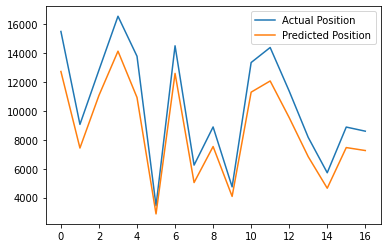

In [151]:
plt.plot(scaler.inverse_transform(test_labels)[0][:17], label="Actual Position")
plt.plot(scaler.inverse_transform(p)[0][:17], label="Predicted Position")
plt.legend()

In [152]:
test_labels

array([[1.00250011, 1.00256893, 1.00239952, ..., 0.88848921, 0.75330396,
        0.87723785],
       [1.00333461, 1.00333892, 1.0032807 , ..., 0.92805755, 0.92511013,
        0.84143223],
       [1.00417652, 1.00414689, 1.00411404, ..., 0.60791367, 0.57268722,
        0.91432225],
       ...,
       [1.22458752, 1.22443039, 1.22448402, ..., 0.99280576, 0.89427313,
        0.98721228],
       [1.22543213, 1.22523951, 1.22531169, ..., 0.67985612, 0.74008811,
        0.90920716],
       [1.2262282 , 1.2260728 , 1.22609559, ..., 0.96043165, 0.59911894,
        0.9168798 ]])

In [155]:
df = pd.read_csv('/content/sumo.csv')

In [156]:
df

,timestep_time,vehicle_0_pos,vehicle_1_pos,vehicle_10_pos,vehicle_11_pos,vehicle_12_pos,vehicle_13_pos,vehicle_14_pos,vehicle_15_pos,vehicle_16_pos,vehicle_17_pos,vehicle_19_pos,vehicle_2_pos,vehicle_4_pos,vehicle_5_pos,vehicle_6_pos,vehicle_7_pos,vehicle_8_pos,vehicle_0_speed,vehicle_1_speed,vehicle_10_speed,vehicle_11_speed,vehicle_12_speed,vehicle_13_speed,vehicle_14_speed,vehicle_15_speed,vehicle_16_speed,vehicle_17_speed,vehicle_19_speed,vehicle_2_speed,vehicle_4_speed,vehicle_5_speed,vehicle_6_speed,vehicle_7_speed,vehicle_8_speed
0,54,643.23,362.75,476.04,551.59,441.71,113.18,383.10,167.00,203.39,104.06,200.55,186.78,99.19,55.45,30.70,18.04,5.10,12.13,6.92,9.78,13.06,11.07,3.06,12.14,4.94,6.72,3.66,10.55,11.54,6.16,6.93,4.33,5.77,0.00
1,55,655.90,370.55,486.83,564.90,452.88,116.03,395.42,171.63,211.02,108.27,211.44,199.25,103.51,61.61,36.01,24.82,6.55,12.66,7.80,10.79,13.31,11.16,2.85,12.32,4.62,7.63,4.21,10.88,12.47,4.32,6.16,5.32,6.78,1.45
2,56,668.23,378.11,497.09,578.71,464.19,119.14,406.73,177.03,218.35,111.52,222.21,211.16,107.05,67.78,40.62,32.47,9.50,12.33,7.56,10.26,13.82,11.31,3.11,11.31,5.40,7.33,3.25,10.77,11.91,3.54,6.17,4.61,7.65,2.94
3,57,679.96,385.32,507.35,591.86,475.16,122.11,419.15,181.79,225.11,115.34,232.95,223.58,110.50,75.01,45.28,39.39,15.02,11.73,7.21,10.26,13.15,10.97,2.98,12.42,4.76,6.76,3.82,10.75,12.41,3.44,7.24,4.65,6.92,5.52
4,58,692.82,393.16,517.24,604.84,486.88,124.68,431.39,186.27,231.74,118.68,243.81,235.65,113.74,81.46,49.98,46.90,22.57,12.86,7.84,9.88,12.98,11.72,2.57,12.24,4.48,6.63,3.34,10.86,12.07,3.24,6.45,4.71,7.51,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,1520,18785.21,10987.21,15560.36,20080.52,16735.93,4163.02,17634.01,7581.01,10819.13,5754.26,16258.77,17530.55,13886.35,9958.51,6975.33,10847.61,10493.85,12.83,7.22,10.45,12.74,11.49,3.37,11.54,4.87,7.22,3.52,10.43,12.17,9.67,6.62,5.31,7.81,7.16
1467,1521,18797.48,10993.97,15570.24,20094.18,16747.63,4165.77,17645.92,7585.58,10826.09,5758.25,16269.75,17542.32,13895.69,9965.89,6980.47,10854.97,10500.88,12.27,6.76,9.88,13.66,11.70,2.75,11.91,4.57,6.96,3.99,10.97,11.76,9.33,7.38,5.14,7.36,7.03
1468,1522,18810.39,11001.14,15581.03,20107.73,16759.24,4168.38,17658.19,7590.28,10832.69,5762.43,16281.01,17553.85,13905.24,9972.27,6985.84,10862.77,10508.60,12.91,7.17,10.79,13.55,11.60,2.61,12.27,4.70,6.60,4.18,11.26,11.54,9.55,6.38,5.37,7.80,7.72
1469,1523,18822.92,11008.17,15591.24,20121.57,16770.22,4170.74,17670.61,7594.98,10840.15,5766.54,16292.60,17565.16,13914.10,9979.05,6990.34,10870.22,10515.70,12.53,7.03,10.21,13.84,10.98,2.35,12.42,4.70,7.46,4.11,11.59,11.31,8.87,6.78,4.50,7.45,7.11
